# Taxis en Chicago y Patrones de Viaje

### Introducción

#### El transporte en taxi juega un papel fundamental en la movilidad urbana de Chicago, conectando personas con diferentes puntos de la ciudad. Este proyecto se centra en analizar datos de viajes realizados por empresas de taxis en noviembre de 2017. Se busca identificar tendencias y patrones relevantes, como las empresas más populares, los destinos más frecuentes y el impacto de factores climáticos, especialmente en días lluviosos o con mal tiempo. A través de este análisis, se utilizarán herramientas estadísticas y visualizaciones para explorar cómo variables como el clima y los días de la semana afectan la demanda de servicios de taxi. Este estudio no solo arrojará información sobre los hábitos de los usuarios, sino también sobre cómo las empresas de taxis pueden optimizar sus operaciones bajo diferentes condiciones.

### Importar las librerías

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

### Importar los archivos

In [69]:
company = pd.read_csv('moved_project_sql_result_01.csv')
trips = pd.read_csv('moved_project_sql_result_04.csv')
weather = pd.read_csv('moved_project_sql_result_07.csv')


### Estudiar los datos que contienen, asegurarse de que los tipos de datos sean correctos

In [70]:
# Imprimos los primeros 10 registros de cada tabla y la información de cada una de ellas
print(company.head(10))
print()
print(company.info())

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                   Medallion Leasin         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None


###### En el DataFrame company no hay valores nulos y los tipos de datos no considero que se les tenga que hacer alguna modificación.

In [71]:
# Imprimos los primeros 10 registros de cada tabla y la información de cada una de ellas
print(trips.head(10))
print()
print(trips.info())

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
None


In [72]:
# Trasformamos la columna 'average_trips' a tipo entero
trips['average_trips'] = trips['average_trips'].astype(int)
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 1.2+ KB


###### En el DataFrame trips la columna 'average_trips' estaba en formato float64 y se transformó a Int, no había valores nulos.

In [73]:
# Imprimimos los primeros 10 registros de cada tabla y la información de cada una de ellas
print(weather.head(10))
print()
print(weather.info())

              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
5  2017-11-11 04:00:00               Good            1320.0
6  2017-11-04 16:00:00                Bad            2969.0
7  2017-11-18 11:00:00               Good            2280.0
8  2017-11-11 14:00:00               Good            2460.0
9  2017-11-11 12:00:00               Good            2040.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-nul

In [74]:
#Trasformamos la columna 'start_ts' a tipo fecha
weather['start_ts'] = pd.to_datetime(weather['start_ts'])

# Trasformamos la columna 'duration_seconds' a tipo entero
weather['duration_seconds'] = weather['duration_seconds'].astype(int)

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


###### En el DataFrame weather transformamos la columna 'starts_ts' al tipo de datos datetime y la columna duration_seconds la transformamos al tipo de datos int.

#### Identificar los 10 principales barrios en términos de finalización del recorrido

In [75]:
# Identificaremos los 10 principales barrios con mayor finalización de viajes
top_10_end_neighborhoods = trips.groupby('dropoff_location_name')['average_trips'].mean().sort_values(ascending=False).head(10).reset_index()
print(top_10_end_neighborhoods)


  dropoff_location_name  average_trips
0                  Loop        10727.0
1           River North         9523.0
2         Streeterville         6664.0
3             West Loop         5163.0
4                O'Hare         2546.0
5             Lake View         2420.0
6            Grant Park         2068.0
7         Museum Campus         1510.0
8            Gold Coast         1364.0
9    Sheffield & DePaul         1259.0


###### Loop y River North tienen una gran ventaja respecto a las otras locaciones mostrando que son las mejores areas para finalizar viajes.

#### Hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones


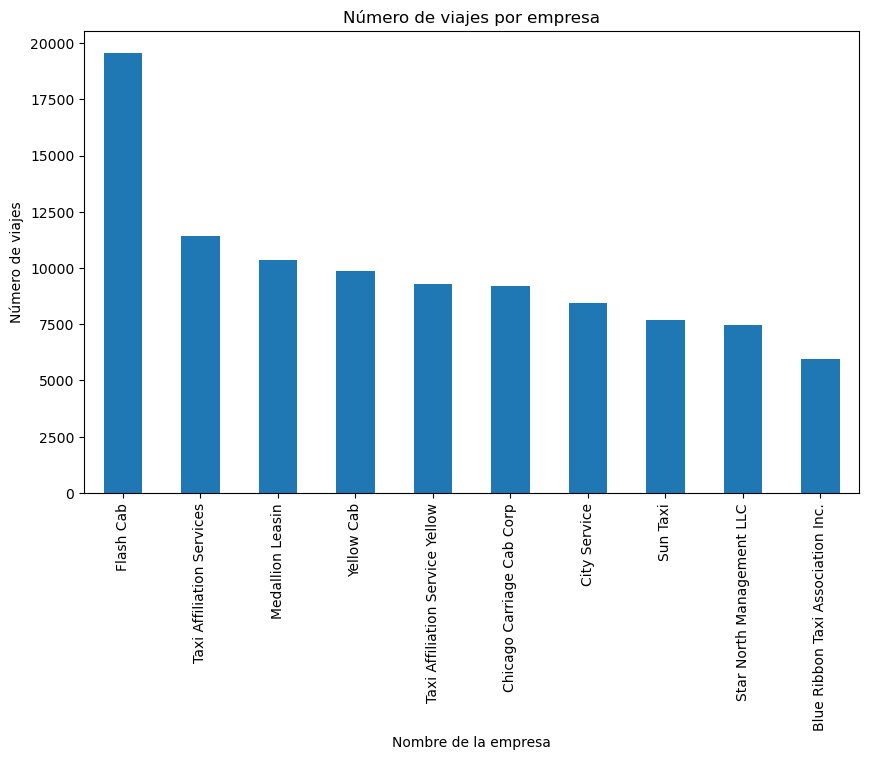

In [76]:
#Crearemos un grafico para cada empresa de taxis y el número de viajes
company_trips = company.groupby('company_name')['trips_amount'].mean().sort_values(ascending=False).reset_index().head(10)

company_trips.plot(kind='bar',
                    xlabel='Nombre de la empresa',
                      x='company_name',
                        y='trips_amount',
                        ylabel='Número de viajes',
                          title='Número de viajes por empresa',
                            figsize=(10, 6),
                              legend=False)

plt.show()


###### La empresa 'Flash Cab' tiene el liderazgo con casi 20000 número de viajes, seguido por 'Taxi Affilation Services' y el último en la tabla siendo 'Blue Ribbon Taxi Association Inc'

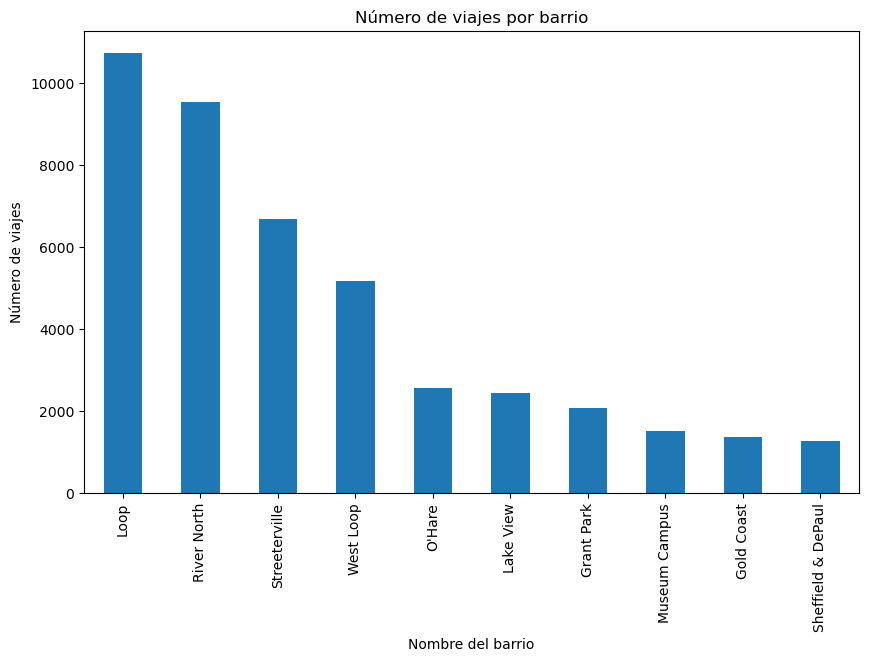

In [77]:
# Identificaremos los 10 barrios principales por número de finalizaciones de viajes
top_10_end_neighborhoods.plot(kind='bar',
                               xlabel='Nombre del barrio',
                                 x='dropoff_location_name',
                                   y='average_trips',
                                     ylabel='Número de viajes',
                                       title='Número de viajes por barrio',
                                         figsize=(10, 6),
                                           legend=False)
plt.show()

###### El barrio 'Loop' tiene el liderazgo con más de 10000 número de viajes terminados, el último siendo 'Sheffiel & DePaul' con menos de 2000 viajes terminados

### Prueba de hipótesis

#### "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

##### Hipótesis nula (H₀): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia en los sábados lluviosos.

##### Hipótesis alternativa (H₁): La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia en los sábados lluviosos.

In [78]:
#Filtramos los datos
saturday_bad = weather['weather_conditions'] == 'Bad'
saturday_good = weather['weather_conditions'] == 'Good'

# Asignamos el valor de alpha
alpha = 0.05

# Realizamos la prueba t
t_stat, p_value = st.ttest_ind(saturday_bad, saturday_good, equal_var=False)

# Imprimimos los resultados
print('t-statistic:', t_stat)
print('p-value:', p_value)

# Comparamos el valor de p con alpha
if p_value < alpha:
    print(f'Rechazamos la hipótesis nula: hay una diferencia significativa entre los días buenos y malos')
else:
    print('No podemos rechazar la hipótesis nula: no hay una diferencia significativa entre los días buenos y malos')

t-statistic: -40.903242233657046
p-value: 1.4959805706438041e-270
Rechazamos la hipótesis nula: hay una diferencia significativa entre los días buenos y malos


### Explica:

### cómo planteaste las hipótesis nula y alternativa


##### La hipótesis nula establece que no hay diferencia significativa entre los días lluviosos y los días con buen clima en términos de la duración de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Es decir, la duración de los viajes no cambia los sábados lluviosos.

##### La hipótesis alternativa es la que se plantea cuando se sugiere que sí existe una diferencia entre los dos grupos. En este caso, se plantea que la duración de los viajes sí cambia en los sábados lluviosos.

### Qué criterio usaste para probar las hipótesis y por qué

#### Elegí la prueba t de Student para comparar las medias de dos grupos (sábados lluviosos y sábados con buen clima). Esta prueba es adecuada porque nos permite determinar si las medias de dos muestras son significativamente diferentes entre sí.
#### La razón para usar esta prueba es que estamos comparando dos grupos independientes y queremos ver si la diferencia entre sus medias es lo suficientemente grande como para no ser atribuible al azar.